In [ ]:
Scientific Question: Is there a correlation between UV exposure and the rate melanoma diagnoses in men and women?
Hypothesis: If there is high exposure to UV radiation in a given location, then we can expect to see high rate of melanoma in both men and women. 

In [32]:
#Geocomputational Analysis
import pandas as pd
!pip install plotly==5.4.0
import plotly as px

In [65]:
import plotly.express as px
from statistics import mean

In [6]:
#Data taken from https://developers.google.com/public-data/docs/canonical/countries_csv
#Converted data to csv file
CountryCoordinates = pd.read_csv("CountryCoordinates.csv")
                   
CountryCoordinates.head()

,abbreviation,latitude,longitude,country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [53]:
#Data taken from https://apps.who.int/gho/data/view.main.35300
#Converted data to csv file
UVRadiation = pd.read_csv("UVRadiation.csv")
                   
UVRadiation.head()

,Country,UV radiation
0,Afghanistan,4132
1,Albania,2542
2,Algeria,3253
3,Andorra,2469
4,Angola,5287


In [33]:
#Merged the two datatables above
#Referenced https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html

merged_world_stats = pd.merge(CountryCoordinates, UVRadiation, left_on='country', right_on='Country')

merged_world_stats.head()

,abbreviation,latitude,longitude,country,Country,UV radiation
0,AD,42.546245,1.601554,Andorra,Andorra,2469
1,AE,23.424076,53.847818,United Arab Emirates,United Arab Emirates,4862
2,AF,33.939110,67.709953,Afghanistan,Afghanistan,4132
3,AG,17.060816,-61.796428,Antigua and Barbuda,Antigua and Barbuda,5148
4,AL,41.153332,20.168331,Albania,Albania,2542


In [51]:
#Plot choropleth 
fig = px.choropleth_mapbox(merged_world_stats, locations='Country', color='UV radiation',
                           color_continuous_scale="Thermal",
                           range_color=(0, 12),
                           mapbox_style="carto-positron",
                           zoom=1,
                           opacity=0.5,
                           labels={'UV radiation':'UV radiation rates'},
                           title="UV Radiation across the World"
                          )
fig.show()

In [59]:
#P-value
#Data on Melanoma rates in these specific countries were found https://www.wcrf.org/dietandcancer/skin-cancer-statistics/
#Melanoma rates in men and compare them to the UV radiation levels in the given countries
#Create a table showcasing Rate of Melanoma in Men to UV radiation

MelanomaMen = pd.read_csv("MelanomaMen.csv", index_col = 0)

MelanomaMen

,Rate of Melanoma in Men,UV radiation
Country,,
Australia,40.4,1888
New Zealand,35.8,2487
Norway,29.0,1439
Netherlands,26.4,1662
Sweden,23.5,1587
Switzerland,23.4,2158
Denmark,22.4,1691
Germany,19.6,1812
Luxembourg,18.1,1687


In [84]:
from statistics import mean, stdev
from scipy import stats

In [80]:
#Find the mean and stdev of the Rates of Melanoma in Men in the given countries
#Referenced https://pythonforundergradengineers.com/statistics-in-python-using-the-statistics-module.html

Melanoma_Men_Data = [40.4,35.8,29.0,26.4,23.5,23.4,22.4,19.6,18.1,18.0,16.2,16.2,15.0,15.0,14.9,14.4,14.0,13.6,13.4,13.3]

mean(Melanoma_Men_Data)


20.13

In [81]:
stdev(Melanoma_Men_Data)

7.699699242246584

In [82]:
#Find the mean and stdev of UV Radiation in the given countries
#Referenced https://pythonforundergradengineers.com/statistics-in-python-using-the-statistics-module.html

UVRadiation_Data = [1888,2487,1439,1662,1587,2158,1691,1812,1687,2256,1645,1494,3206,1576,2736,1907,2444,1509,1887,1707
]

mean(UVRadiation_Data)

1938.9

In [83]:
stdev(UVRadiation_Data)

470.01286656520597

In [86]:
#Find p-value with given mean's and stdev's that have been found
#Referenced https://www.tutorialspoint.com/python_data_science/python_p_value.htm
#Loc represents the mean, scale is the stdev, and size is the size of the sample

Melanoma_Men = stats.norm.rvs(loc = 20.13,scale = 7.699699242246584,size = 20)

UVRadiationData =stats.norm.rvs(loc = 1938.9, scale = 470.01286656520597,size =20)

print(stats.ttest_ind(Melanoma_Men,UVRadiationData))

Ttest_indResult(statistic=-22.00347425901091, pvalue=3.1804104899928445e-23)


In [87]:
#Look at the Melanoma rates in women and compare them to the UV radiation levels in the given countries
#Create table showcasing Rate of Melanoma in Women to UV radiation

MelanomaWomen = pd.read_csv("MelanomaWomen.csv", index_col = 0)

MelanomaWomen

,Rate of Melanoma in Women,UV radiation
Country,,
Australia,12.6,1888
New Zealand,31.1,2487
Norway,30.7,1439
Netherlands,25.4,1662
Sweden,26.2,1587
Switzerland,19.5,2158
Denmark,33.1,1691
Germany,24.0,1812
Luxembourg,15.4,1687


In [88]:
#Find the mean and stdev of the Rates of Melanoma in Women in the given countries (countries are the same as those for men)
Melanoma_Women_Data = [12.6,31.1,30.7,25.4,26.2,19.5,33.1,24,15.4,19.7,23.9,15.9,12.6,15.3,11,12.9,11,19,11.7,12.4]

mean(Melanoma_Women_Data)

19.17

In [89]:
stdev(Melanoma_Women_Data)

7.270423139788973

In [90]:
#Find p-values with mean's and stdev's found 
Melanoma_Women = stats.norm.rvs(loc = 19.17,scale = 7.270423139788973,size = 20)

UVRadiationData =stats.norm.rvs(loc = 1938.9, scale = 470.01286656520597,size =20)

print(stats.ttest_ind(Melanoma_Women,UVRadiationData))

Ttest_indResult(statistic=-16.879485082764074, pvalue=3.0067785747723396e-19)


In [99]:
import matplotlib.pyplot as plt
import numpy as np

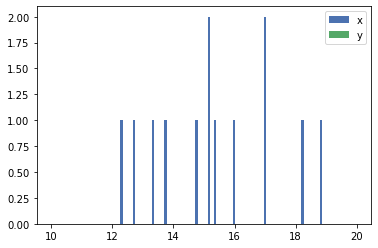

In [132]:
#Histogram to represent the Rates of Melanoma in Men in comparison to UV radiation
#Referenced https://stackoverflow.com/questions/33203645/how-to-plot-a-histogram-using-matplotlib-in-python-with-a-list-of-data
plt.style.use('seaborn-deep')

x = np.random.normal(Melanoma_Men_Data)
y =np.random.normal(UVRadiation_Data)
bins = np.linspace(10, 20, 50)

plt.hist([x, y], bins, label=['x', 'y'])
plt.legend(loc='upper right')
plt.show()

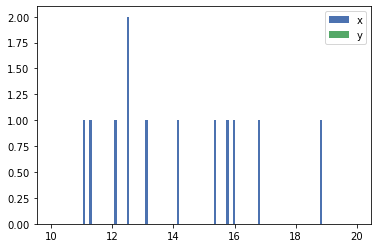

In [133]:
#Histogram to represent the Rates of Melanoma in Men in comparison to UV radiation
plt.style.use('seaborn-deep')

x = np.random.normal(Melanoma_Women_Data)
y =np.random.normal(UVRadiation_Data)
bins = np.linspace(10, 20, 50)

plt.hist([x, y], bins, label=['x', 'y'])
plt.legend(loc='upper right')
plt.show()